In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
%matplotlib inline

data_train = pd.read_csv("train.csv")

In [2]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


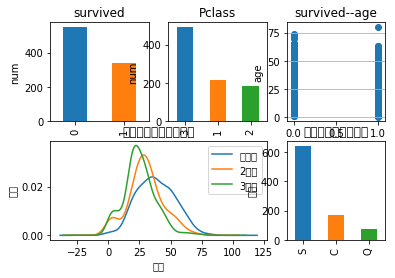

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha = 0.2)
#fig.set_alpha(0.2)

plt.subplot2grid((2,3), (0,0))
data_train.Survived.value_counts().plot(kind='bar')
plt.ylabel('num')
plt.title('survived')

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind='bar')
plt.ylabel('num')
plt.title('Pclass')

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.ylabel('age')
plt.title('survived--age')
plt.grid(b=True, which='major', axis='y') 


plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')   
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u"年龄")# plots an axis lable
plt.ylabel(u"密度") 
plt.title(u"各等级的乘客年龄分布")
plt.legend((u'头等舱', u'2等舱',u'3等舱'),loc='best') # sets our legend for our graph.


plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"各登船口岸上船人数")
plt.ylabel(u"人数")  
plt.show()


plt.show()

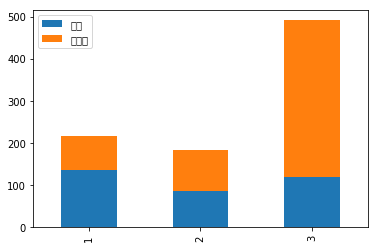

In [5]:
fig = plt.figure()
fig.set(alpha=0.2)

Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()

df=pd.DataFrame({u'获救':Survived_1, u'未获救':Survived_0})
df.plot(kind='bar', stacked=True)

plt.show()

In [6]:
df

,获救,未获救
1,136,80
2,87,97
3,119,372


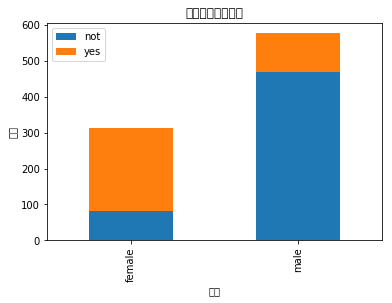

,not,yes
female,81,233
male,468,109


In [7]:
fig = plt.figure()
fig.set(alpha=0.2)  # 设定图表颜色alpha参数

Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_f = data_train.Survived[data_train.Sex == 'female'].value_counts()
df=pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})

Survived_a = data_train.Sex[data_train.Survived == 0].value_counts()
Survived_b = data_train.Sex[data_train.Survived == 1].value_counts()
df2 = pd.DataFrame({u'not':Survived_a, u'yes':Survived_b})



df2.plot(kind='bar', stacked=True)
plt.title(u"按性别看获救情况")
plt.xlabel(u"性别") 
plt.ylabel(u"人数")
plt.show()

df2

In [8]:
from sklearn.ensemble import RandomForestRegressor

### 使用 RandomForestClassifier 填补缺失的年龄属性
def set_missing_ages(df):

    # 把已有的数值型特征取出来丢进Random Forest Regressor中
    age_df = df[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]

    # 乘客分成已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].as_matrix()
    unknown_age = age_df[age_df.Age.isnull()].as_matrix()

    # y即目标年龄
    y = known_age[:, 0]

    # X即特征属性值
    X = known_age[:, 1::]
    
    # fit到RandomForestRegressor之中
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)

    # 用得到的模型进行未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:, 1::])

    # 用得到的预测结果填补原缺失数据
    df.loc[ (df.Age.isnull()), 'Age' ] = predictedAges 

    return df, rfr

def set_Cabin_type(df):
    df.loc[ (df.Cabin.notnull()), 'Cabin' ] = "Yes"
    df.loc[ (df.Cabin.isnull()), 'Cabin' ] = "No"
    return df

data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)

/home/zhangbo39/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.
/home/zhangbo39/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


In [9]:
dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix='Cabin')
dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix='Embarked')
dummies_Sex = pd.get_dummies(data_train['Sex'], prefix='Sex')
dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix='Pclass')
df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.647248,0.523008,0.381594,32.204208,0.771044,0.228956,0.188552,0.086420,0.722783,0.352413,0.647587,0.242424,0.206510,0.551066
std,257.353842,0.486592,13.629879,1.102743,0.806057,49.693429,0.420397,0.420397,0.391372,0.281141,0.447876,0.477990,0.477990,0.428790,0.405028,0.497665
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,21.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,29.000000,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,36.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()
age_scale_param = scaler.fit(df[['Age']])
df['Age_scaled'] = scaler.fit_transform(df[['Age']], age_scale_param)
fare_scale_param = scaler.fit(df[['Fare']])
df['Fare_scaled'] = scaler.fit_transform(df[['Fare']], fare_scale_param)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Cabin_No       891 non-null uint8
Cabin_Yes      891 non-null uint8
Embarked_C     891 non-null uint8
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
Sex_female     891 non-null uint8
Sex_male       891 non-null uint8
Pclass_1       891 non-null uint8
Pclass_2       891 non-null uint8
Pclass_3       891 non-null uint8
Age_scaled     891 non-null float64
Fare_scaled    891 non-null float64
dtypes: float64(4), int64(4), uint8(10)
memory usage: 64.5 KB


In [11]:
from sklearn import linear_model

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

y = train_np[:,0]
X = train_np[:, 1:]

print(y.shape)
print(X.shape)
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(X,y)

clf

(891,)
(891, 14)


/home/zhangbo39/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [12]:
data_test = pd.read_csv("./test.csv")
data_test.loc[ (data_test.Fare.isnull()), 'Fare' ] = 0
#data_test = data_test.fillna({'Fare':0})
# 接着我们对test_data做和train_d ata中一致的特征变换
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
tmp_df = data_test[['Age','Fare', 'Parch', 'SibSp', 'Pclass']]
null_age = tmp_df[data_test.Age.isnull()].as_matrix()
# 根据特征属性X预测年龄并补上
X = null_age[:, 1:]
predictedAges = rfr.predict(X)
data_test.loc[ (data_test.Age.isnull()), 'Age' ] = predictedAges

data_test = set_Cabin_type(data_test)
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix= 'Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix= 'Embarked')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix= 'Sex')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix= 'Pclass')


df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df_test['Age_scaled'] = scaler.fit_transform(df_test[['Age']], age_scale_param)
df_test['Fare_scaled'] = scaler.fit_transform(df_test[['Fare']], fare_scale_param)
df_test.info()

/home/zhangbo39/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 17 columns):
PassengerId    418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Cabin_No       418 non-null uint8
Cabin_Yes      418 non-null uint8
Embarked_C     418 non-null uint8
Embarked_Q     418 non-null uint8
Embarked_S     418 non-null uint8
Sex_female     418 non-null uint8
Sex_male       418 non-null uint8
Pclass_1       418 non-null uint8
Pclass_2       418 non-null uint8
Pclass_3       418 non-null uint8
Age_scaled     418 non-null float64
Fare_scaled    418 non-null float64
dtypes: float64(4), int64(3), uint8(10)
memory usage: 27.0 KB


In [13]:
#train_df = df.filter(regex='Survived|Age_.*|Sibsp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Pclass_.*|Sex_.*')

test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(test)
predictions
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(), 'Survived':predictions.astype(np.int32)})
result.to_csv("./logistic_regression_predictions.csv", index=False)

/home/zhangbo39/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [16]:
pd.DataFrame({'columns':list(train_df.columns[1:]), 'coef':list(clf.coef_.T)})

,columns,coef
0,SibSp,[-0.344235594186]
1,Parch,[-0.104916021468]
2,Cabin_No,[0.0]
3,Cabin_Yes,[0.902108163233]
4,Embarked_C,[0.0]
5,Embarked_Q,[0.0]
6,Embarked_S,[-0.417264050826]
7,Sex_female,[1.95657180753]
8,Sex_male,[-0.677419831543]
9,Pclass_1,[0.341157738914]


In [60]:
#cross-validation
#from sklearn.model_selection import cross_val_score

#from sklearn import cross_validation
from sklearn import model_selection

#简单看看打分情况
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
X = all_data.values[:,1:]
y = all_data.values[:,0]

print(X.shape)
print(y.shape)
print(model_selection.cross_val_score(clf, X, y, cv=5))


(891, 14)
(891,)
[ 0.81564246  0.81564246  0.78651685  0.78651685  0.81355932]


In [37]:
split_train, split_cv = model_selection.train_test_split(df, test_size=0.3, random_state=0)
train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
#clf.fit(train_df.as_matrix()[:,1:], train_df.as_matrix()[:,0])
clf.fit(train_df.values[:,1:], train_df.values[:,0])

cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.values[:,1:])

bad_cases = df[df.PassengerId.isin(split_cv.PassengerId[predictions != cv_df.Survived].values)]
bad_cases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 14 to 882
Data columns (total 18 columns):
PassengerId    50 non-null int64
Survived       50 non-null int64
Age            50 non-null float64
SibSp          50 non-null int64
Parch          50 non-null int64
Fare           50 non-null float64
Cabin_No       50 non-null uint8
Cabin_Yes      50 non-null uint8
Embarked_C     50 non-null uint8
Embarked_Q     50 non-null uint8
Embarked_S     50 non-null uint8
Sex_female     50 non-null uint8
Sex_male       50 non-null uint8
Pclass_1       50 non-null uint8
Pclass_2       50 non-null uint8
Pclass_3       50 non-null uint8
Age_scaled     50 non-null float64
Fare_scaled    50 non-null float64
dtypes: float64(4), int64(4), uint8(10)
memory usage: 4.0 KB


In [52]:
from sklearn.learning_curve import learning_curve

def plot_learning_curv(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,
                      train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    
    train_size, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    print(train_scores)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        #plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")

        plt.legend(loc="best")

        plt.draw()
        plt.show()
        #plt.gca().invert_yaxis()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

#plot_learning_curv(clf, u"学习曲线", X, y)

[[ 0.88571429  0.88571429  0.88571429  0.88571429  0.88571429]
 [ 0.84507042  0.85915493  0.85915493  0.85915493  0.85915493]
 [ 0.81132075  0.86792453  0.86792453  0.86792453  0.86792453]
 [ 0.79577465  0.83802817  0.83802817  0.83802817  0.83802817]
 [ 0.82022472  0.83707865  0.84269663  0.84269663  0.84269663]
 [ 0.81220657  0.83568075  0.83098592  0.83098592  0.83098592]
 [ 0.80722892  0.83935743  0.82329317  0.82329317  0.82329317]
 [ 0.79577465  0.82746479  0.8028169   0.8028169   0.8028169 ]
 [ 0.80625     0.83125     0.8         0.8         0.8       ]
 [ 0.7971831   0.83098592  0.81690141  0.81690141  0.81690141]
 [ 0.80051151  0.82608696  0.81585678  0.81841432  0.81841432]
 [ 0.79859485  0.82435597  0.80562061  0.80796253  0.80796253]
 [ 0.80735931  0.82467532  0.80952381  0.8030303   0.8030303 ]
 [ 0.79919679  0.82931727  0.80522088  0.80321285  0.80321285]
 [ 0.79775281  0.82209738  0.81086142  0.79775281  0.79962547]
 [ 0.80492091  0.82776801  0.81546573  0.80316344  0.80

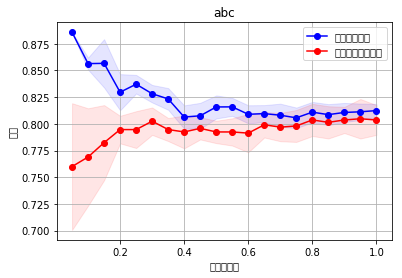

(0.80412095046015697, 0.028989030232112856)

In [54]:
plot_learning_curv(clf,u'abc', X, y, cv=5)

In [55]:
from sklearn.ensemble import BaggingRegressor

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
train_np = train_df.values

# y即Survival结果
y = train_np[:, 0]

# X即特征属性值
X = train_np[:, 1:]

# fit到BaggingRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
bagging_clf = BaggingRegressor(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(X, y)

test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions = bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("./logistic_regression_bagging_predictions.csv", index=False)

[[ 0.38983333  0.67687908  0.58366013  0.58909314  0.63598856]
 [ 0.4244697   0.60706653  0.57500202  0.5961875   0.61193347]
 [ 0.30269903  0.47019887  0.49764353  0.5090788   0.45299625]
 [ 0.29114516  0.39663004  0.37758349  0.37651261  0.39249946]
 [ 0.36439138  0.36098989  0.34951787  0.39458197  0.36314485]
 [ 0.31948305  0.37172662  0.35034586  0.34361584  0.3935733 ]
 [ 0.31092971  0.37039975  0.33544639  0.33677861  0.30933496]
 [ 0.31361308  0.3427353   0.30770871  0.29341882  0.2883098 ]
 [ 0.28884609  0.34733436  0.2821961   0.28422277  0.29322646]
 [ 0.30589829  0.33747065  0.30684307  0.32057189  0.30526811]
 [ 0.29204634  0.33851908  0.31614285  0.34296452  0.33155579]
 [ 0.28315519  0.30406576  0.29190783  0.28993381  0.30968399]
 [ 0.32734153  0.34642612  0.28855125  0.29386309  0.28618598]
 [ 0.28240621  0.30608748  0.2709353   0.29790164  0.28220827]
 [ 0.30633338  0.30405378  0.27244711  0.29539201  0.27941674]
 [ 0.3176061   0.35552679  0.28788068  0.27895286  0.28

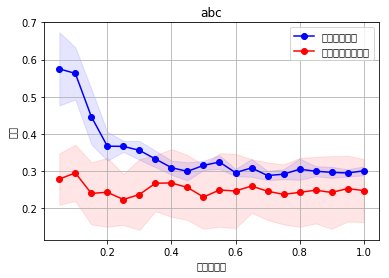

(0.23764661395750158, 0.14989951302849194)

In [56]:
plot_learning_curv(bagging_clf,u'abc', X, y, cv=5)

In [57]:
print(model_selection.cross_val_score(bagging_clf, X, y, cv=5))

[ 0.20499223  0.27887355  0.17135687  0.15460495  0.36066184]
